### 1.  i~j번째 숫자까지 슬라이싱 한 후 k번째에 있는 수를 찾아 출력
- 원본 리스트 : [2,44,73,54,23,29,85,34]  
i,j,k : [[6,8,2],[4,8,5]]  
출력 : [85,34]


In [72]:
def ijk(origin,ijklist):
    result=[]
    for i,j,k in ijklist:
        result.append(origin[i-1:j+1][k-1])    
    return result

if __name__=="__main__":
    origin=[2,44,73,45,8,95,78,58,46,55,99,54,23,29,85,34] #임의로 입력
    ijklist=[[6,8,2],[4,8,5],[2,5,2],[1,8,9]]
    print(ijk(origin,ijklist))

[78, 58, 73, 46]


### 2. 주어진 문장에서 'encore' 또는 '엔코어'를 찾는 프로그램
- 문장은 input으로  
공백 기준으로 분할 후 리스트에 저장  
문장에서 단어를 찾고,위치값과 함께 반환  
문장 예)오늘은 금요일이고, 7월의 엔코어 수업 마지막 날입니다. 모두들 수고하셨습니다.  
hi, encore.
             
             
- 형태소 분석기 : import konlpy.tag import Okt   
  re : 정규표현식으로 한글 제외한것 삭제  
  re.compile()  
  

In [49]:
def searchencore(s):
    index=0
    s=s.replace('.','').split()
    keyword=['엔코어','encore']
    for i in keyword:
        if i in s:
            index=s.index(keyword[keyword.index(i)])
    return s,index

if __name__=="__main__":
    s=input("enter string>>")
    print("{}, {}".format(searchencore(s)[0],searchencore(s)[1]))

enter string>>오늘은 금요일이고, 7월의 수업 마지막 날입니다. 모두들 수고하셨습니다. 엔코어.
['오늘은', '금요일이고,', '7월의', '수업', '마지막', '날입니다', '모두들', '수고하셨습니다', '엔코어'], 8


### 3. 콜라츠 추측
- 주어진 수가 1이 될때 다음 작업을 반복해 모든수를 2로 만들수 있다는 추측
    + 입력된 수가 짝수면 2로 나눔
      홀수면 3을 곱하고 1을 더함
      결과로 나온 수에 같은 작업을 1이 될때까지 반복
    + 반복의 수가 500이 되도록 1이 안되면 -1을 반환 (예 : 626331)
- 예) 6, 6->3->10->5->16->8->4->2->1

In [82]:
def collatz(n):
    t=0
    while n!=1:
        if n%2==0:
            n=n//2
        else:
            n=(n*3)+1
        t += 1
        if t >500:
            t=-1
            break          
    return t

if __name__=="__main__":
    n=int(input("enter integer>>"))
    if collatz(n)==-1:
        print("-1")
    else:
        print("{}은 {}번 만에 1이 됨".format(n,collatz(n)))

enter integer>>5
5은 5번 만에 1이 됨


## 디버깅 pdb
- jupyter에서 사용하는 디버깅 패키지

In [84]:
import pdb

def collatz(n):
    t=0
    while n!=1:
        if n%2==0:
            n=n//2
        else:
            n=(n*3)+1
        t += 1
        if t >500:
            t=-1
            break          
    return t

if __name__=="__main__":
    n=int(input("enter integer>>"))
    pdb.set_trace()
    if collatz(n)==-1:
        print("-1")
    else:
        pdb.set_trace()
        print("{}은 {}번 만에 1이 됨".format(n,collatz(n)))
    


enter integer>>5
> <ipython-input-84-066ff8c617ef>(19)<module>()
     17     n=int(input("enter integer>>"))
     18     pdb.set_trace()
---> 19     if collatz(n)==-1:
     20         print("-1")
     21     else:

ipdb> n
> <ipython-input-84-066ff8c617ef>(22)<module>()
     20         print("-1")
     21     else:
---> 22         pdb.set_trace()
     23         print("{}은 {}번 만에 1이 됨".format(n,collatz(n)))
     24 

ipdb> c
> <ipython-input-84-066ff8c617ef>(23)<module>()
     20         print("-1")
     21     else:
     22         pdb.set_trace()
---> 23         print("{}은 {}번 만에 1이 됨".format(n,collatz(n)))
     24 

ipdb> c
5은 5번 만에 1이 됨


#   pandas

## Series 객체

### astype() : 타입 변경

In [96]:
import pandas as pd
import numpy as np

srs1=pd.Series([10,20,30,40,50,60],dtype=float)
print(srs1[0])
print(srs1[1])
print(srs1[2],srs1[3])
print(srs1.index,srs1.values)#index: RangeIndex(start=0, stop=6, step=1)
srs1=srs1.astype(int)
print(srs1)

10.0
20.0
30.0 40.0
RangeIndex(start=0, stop=6, step=1) [10. 20. 30. 40. 50. 60.]
0    10
1    20
2    30
3    40
4    50
5    60
dtype: int32


### date_range()

In [99]:
dates=pd.date_range('2020-07-27','2020-07-31')
temp1=pd.Series([27,31,28,29,30],index=dates)
print(temp1)
print()

temp2=pd.Series([30,33,25,29,32],index=dates)
temp_diff=temp2-temp1 #연산 결과는 Series객체
print(temp_diff)
print(temp_diff['2020-07-31'],temp_diff[4])
print()

print(temp1.mean())
print(temp1.min())
print(min(temp1))

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, dtype: int64

2020-07-27    3
2020-07-28    2
2020-07-29   -3
2020-07-30    0
2020-07-31    2
Freq: D, dtype: int64
2 2

29.0
27
27


In [104]:
srs3= pd.Series([[1,2,3,4],[5,6,7,8]])
print(srs3.index)
print(srs3.values)
print(srs3[0])
print(srs3[0][0])
print(srs3[[0,1]])

RangeIndex(start=0, stop=2, step=1)
[list([1, 2, 3, 4]) list([5, 6, 7, 8])]
[1, 2, 3, 4]
1
0    [1, 2, 3, 4]
1    [5, 6, 7, 8]
dtype: object


# DataFrame 데이터프레임

### 인덱스 속성 추가

In [109]:
srs3 = pd.DataFrame([[1,2,3,4],[5,6,7,8]], columns=['a','b','c','d'], index=['aa','bb'])
print(srs3)
print(srs3['b'])
print()
print(srs3['b'][0])#print(srs3['b']['aa'])
print(srs3[['b','c']])
srs3

    a  b  c  d
aa  1  2  3  4
bb  5  6  7  8
aa    2
bb    6
Name: b, dtype: int64

2
    b  c
aa  2  3
bb  6  7


,a,b,c,d
aa,1,2,3,4
bb,5,6,7,8


### 인덱스, 컬럼명 변경

In [108]:
srs3.index = ['cc','dd']
srs3.columns = ['one','two','three','four']
srs3

,one,two,three,four
cc,1,2,3,4
dd,5,6,7,8


### 컬럼명 속성 없는 데이터프레임에 name 속성 추가하는 방법

In [114]:
temp_df2 = pd.DataFrame([temp1,temp2])#error => 컬럼명이 없어서

#error를 없애기 위해서 temp1,temp2에 name 속성 채우기
temp1.name='Seoul'
temp2.name='Pusan'
temp_df2 = pd.DataFrame([temp1,temp2])
temp_df2

,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
Seoul,27,31,28,29,30
Pusan,30,33,25,29,32


In [131]:
temp_df2['2020-07-27']

Seoul    27
Pusan    30
Name: 2020-07-27 00:00:00, dtype: int64

In [118]:
dates = pd.date_range('2020-07-27','2020-07-31')
temp1 = pd.Series([27,31,28,29,30], index=dates) #name=‘Seoul’
temp2 = pd.Series([30,33,25,29,32], index=dates)
temp_df = pd.DataFrame({'Seoul': temp1,'Pusan': temp2,})
print(temp_df)
print()
print(temp_df['Seoul'])
print()
print(temp_df['Seoul']['2020-07-31'])

            Seoul  Pusan
2020-07-27     27     30
2020-07-28     31     33
2020-07-29     28     25
2020-07-30     29     29
2020-07-31     30     32

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, Name: Seoul, dtype: int64

30


#### print(temp_df['2020-07-31'])  => 오류 발생, '2020-07-31'가 아닌 컬럼명이 반드시 들어가야 함
#### 위와 같은 경우를 해결하기 위해 loc,iloc 사용 - 행 단위 이용

In [122]:
temp_df2.loc['Seoul']

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, Name: Seoul, dtype: int64

In [126]:
temp_df2.iloc[0]

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, Name: Seoul, dtype: int64

In [127]:
temp_df2.ix[0] # 이제 안씀

AttributeError: 'DataFrame' object has no attribute 'ix'

### 데이터 프레임을  table 형식으로 보여주기위해 print 대신 사용하는 함수

In [139]:
from IPython.display import display

## iloc['행 인덱스 번호'], loc['행 이름']


In [141]:
from IPython.display import display 
df = pd.DataFrame(np.array([[1,2,3],[10,20,30],[7,8,9]]),
index=[1,'B',2],columns=['T','N','P'])
display(df)
# print(df.ix[1])
print(df.iloc[1])
# print(df.ix['B'])
print(df.loc['B'])

,T,N,P
1,1,2,3
B,10,20,30
2,7,8,9


T    10
N    20
P    30
Name: B, dtype: int32
T    10
N    20
P    30
Name: B, dtype: int32


In [143]:
dates = pd.date_range('2020-07-27','2020-07-31')

temp1 = pd.Series([27,31,28,0,30], index=dates)
temp2 = pd.Series([30,33,25,29,32], index=dates)
temp3 = pd.Series([27,25,26,0,28], index=dates,name='Kwangju')
temp4 = pd.Series([29,0,26,28,30], index=dates)
temp5 = pd.concat([temp1,temp2],axis=1,keys=['Seoul','Pusan'])
display(temp5)
temp6 = pd.concat([temp5,temp3],axis=1)
display(temp6)
temp7 = temp5.append(temp3,ignore_index=True)
display(temp7)


,Seoul,Pusan
2020-07-27,27,30
2020-07-28,31,33
2020-07-29,28,25
2020-07-30,0,29
2020-07-31,30,32


,Seoul,Pusan,Kwangju
2020-07-27,27,30,27
2020-07-28,31,33,25
2020-07-29,28,25,26
2020-07-30,0,29,0
2020-07-31,30,32,28


,Seoul,Pusan,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,27.0,30.0,NaN,NaN,NaN,NaN,NaN
1,31.0,33.0,NaN,NaN,NaN,NaN,NaN
2,28.0,25.0,NaN,NaN,NaN,NaN,NaN
3,0.0,29.0,NaN,NaN,NaN,NaN,NaN
4,30.0,32.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,27.0,25.0,26.0,0.0,28.0


## 데이터프레임 합치기 join :  merge()

In [147]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left_right = pd.merge(left, right, on= 'key')
display(left_right)

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [148]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left_right = pd.merge(left, right, on= 'key')
display(left_right)

,key,lval,rval
0,foo,1,4
1,foo,2,4


In [145]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
merge_data=pd.merge(left, right, on= 'key')
display(merge_data)

,key,lval,rval
0,foo,1,4
1,bar,2,5


## 컬럼 추가
- loc
- dataframe 이름.['새로운 컬럼 이름']

In [167]:
df = pd.DataFrame(np.array([[1,2,3],[10,20,30],[7,8,9]]),index=[1,'B',2],columns=['T','N','P'])
display(df)

df.loc[:, 'Y'] = pd.Series([100,200,300],index=df.index)
display(df)

df['M'] = pd.Series([11,12,13], index=df.index)
display(df)

,T,N,P
1,1,2,3
B,10,20,30
2,7,8,9


,T,N,P,Y
1,1,2,3,100
B,10,20,30,200
2,7,8,9,300


,T,N,P,Y,M
1,1,2,3,100,11
B,10,20,30,200,12
2,7,8,9,300,13


## 컬럼 삭제 : drop()
- 원본 파일에도 적용하고싶으면 inplace 속성 True 로

In [156]:
a = df.drop('T',axis=1,inplace=False) #원본 반영 X
display(df)

display(a)

df.drop('T',axis=1,inplace=True) #원본 반영
display(df)

,T,N,P,Y,M
1,1,2,3,100,11
B,10,20,30,200,12
2,7,8,9,300,13


,N,P,Y,M
1,2,3,100,11
B,20,30,200,12
2,8,9,300,13


,N,P,Y,M
1,2,3,100,11
B,20,30,200,12
2,8,9,300,13


## 행 삭제

In [168]:
print(df.index[1])
df.drop(df.index[1],inplace=True)
display(df)
print(df.drop(1))
display(df)

B


,T,N,P,Y,M
1,1,2,3,100,11
2,7,8,9,300,13


   T  N  P    Y   M
2  7  8  9  300  13


,T,N,P,Y,M
1,1,2,3,100,11
2,7,8,9,300,13


## 데이터 수정
- iloc : 0,0 위치
- loc : '1'이라는 이름의 행의 값 , (주의) 인덱스 1위치가 아님

In [169]:
df.iloc[0,0] = 1000 
display(df)
df.loc[1,'N'] = 2000 
display(df)

x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})
x.iloc[1] = {'x': 9, 'y': 99}
x

,T,N,P,Y,M
1,1000,2,3,100,11
2,7,8,9,300,13


,T,N,P,Y,M
1,1000,2000,3,100,11
2,7,8,9,300,13


,x,y
0,1,3
1,9,99
2,3,5


## 데이터프레임 복합읽기

In [174]:
display(temp6)
display(temp6.loc['2020-07-27':'2020-07-29','Seoul':'Pusan'])
display(temp6.loc[temp6['Seoul']> 30,:])
display(temp6.loc[temp6['Seoul']> 30,'Seoul':'Seoul'])
display(temp6.loc[temp6['Pusan']>30])
display(temp6[temp6['Pusan']>30])

,Seoul,Pusan,Kwangju
2020-07-27,27,30,27
2020-07-28,31,33,25
2020-07-29,28,25,26
2020-07-30,0,29,0
2020-07-31,30,32,28


,Seoul,Pusan
2020-07-27,27,30
2020-07-28,31,33
2020-07-29,28,25


,Seoul,Pusan,Kwangju
2020-07-28,31,33,25


,Seoul
2020-07-28,31


,Seoul,Pusan,Kwangju
2020-07-28,31,33,25
2020-07-31,30,32,28


,Seoul,Pusan,Kwangju
2020-07-28,31,33,25
2020-07-31,30,32,28


### 기존에 존재하는 컬럼명을 사용하는 경우
- 이런 형태도 사용할수 있지만, table 형식으로 안나오네..

In [177]:
display(temp6.Pusan[0:3])
display(temp6.Pusan[temp6.Pusan>30])
display(temp6[temp6.Seoul > 30])
display(temp6.Pusan['2020-07-27':'2020-07-29'])
display(temp6.iloc[[1,3]].Seoul)
display(temp6.Kwangju > 27)

2020-07-27    30
2020-07-28    33
2020-07-29    25
Freq: D, Name: Pusan, dtype: int64

2020-07-28    33
2020-07-31    32
Name: Pusan, dtype: int64

,Seoul,Pusan,Kwangju
2020-07-28,31,33,25


2020-07-27    30
2020-07-28    33
2020-07-29    25
Freq: D, Name: Pusan, dtype: int64

2020-07-28    31
2020-07-30     0
Freq: 2D, Name: Seoul, dtype: int64

2020-07-27    False
2020-07-28    False
2020-07-29    False
2020-07-30    False
2020-07-31     True
Freq: D, Name: Kwangju, dtype: bool

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

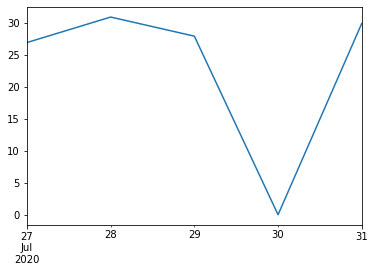

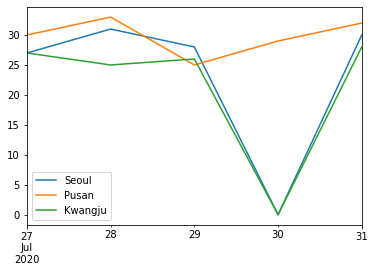

In [181]:
temp6.Seoul.plot()
temp6.plot()
plt.show()

# 데이터 분석 교재 p.74

## drink 음주 데이터

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file_path = '../Downloads/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


- agg() 을 이용해 대륙별로 분석

In [9]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


- 전체 평균보다 많은 알콜을 섭취하는 대륙 : mean()을 이용한 방법

In [16]:
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean=continent_mean[continent_mean>=total_mean]
print(continent_over_mean)

continent
EU    8.617778
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


- 평균 beer_servings가 가장 높은 대륙 : idxmax()

In [18]:
beer_continent=drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

# 시각화

In [26]:
drinks.spirit_servings

0        0
1      132
2        0
3      138
4       57
      ... 
188    100
189      2
190      0
191     19
192     18
Name: spirit_servings, Length: 193, dtype: int64

- 대륙별  spirit_servings의 평균,최소,최대,합계 를 시각화

In [29]:
# 위에 agg()을 이용해 생성했던 테이블
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


In [30]:
means

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 114.75]

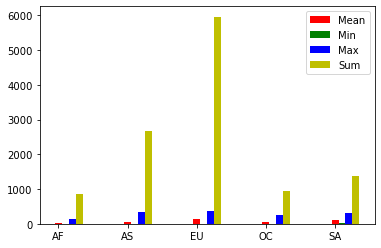

In [22]:
n_groups =len(result.index)
means= result['mean'].tolist()
mins= result['min'].tolist()
maxs= result['max'].tolist()
sums= result['sum'].tolist()

index= np.arange(n_groups)
bar_width=0.1

rects1=plt.bar(index,means,bar_width,color='r',label='Mean')
rects2=plt.bar(index+bar_width,mins,bar_width,color='g',label='Min')
rects3=plt.bar(index+bar_width*2,maxs,bar_width,color='b',label='Max')
rects4=plt.bar(index+bar_width*3,sums,bar_width,color='y',label='Sum')

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show()

- 대률별 total_litres_of_pure_alcohol을 시각화

Text(0.5, 1.0, 'total_litres_of_pure_alcohol by continent')

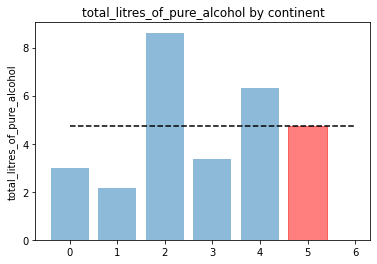

In [23]:
continents=continent_mean.index.tolist()
continents.append('mean')
x_pos =np.arange(len(continents))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos,alcohol,align='center',alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6],[total_mean,total_mean],"k--")

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by continent')

- 대륙별 beer_servings를 시각화

Text(0.5, 1.0, 'beer_servings by continent')

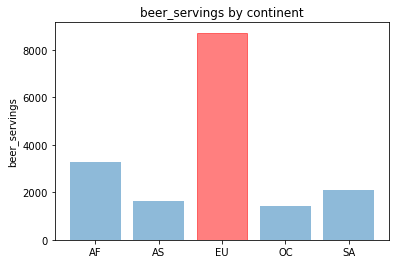

In [27]:
beer_group=drinks.groupby('continent')['beer_servings'].sum()
continents=beer_group.index.tolist()
y_pos =np.arange(len(continents))
alcohol=beer_group.tolist()

bar_list = plt.bar(y_pos,alcohol,align='center',alpha=0.5)
bar_list[continents.index('EU')].set_color('r')

plt.xticks(y_pos,continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by continent')